A _multiplex stream graph_ $M = (T,T_M,V,W_M,E_M,{\cal L})$

- $T$ is an interval
- $T_M$ is a set of intervals
- $V$ is a set of nodes
- $W_M$ is a set of (t,u,\alpha_1,...,\alpha_d)
- $E_M$ is a set of (t,u,\alpha_1,...,\alpha_d, v,\beta_1,...,\beta_d)
- ${\cal L}$ is a set of aspects, containing elementary layers.


We begin by constructing **"interval"** object and a few methods.

We the contruct the lists of intervals which respects the following contraints : 
- the intervals are separated,
- the intervals are sorted on crescent time

I didn't created the class **list of intervall**, I don't know if it's usefull...


(Tiph) Documenting (even minimally) each function would be nice; Python supports docstrings for that purpose, see: http://sametmax.com/les-docstrings/ for example :)

In [1]:
from sortedcollection import *


sorted collection imported


In [3]:
"""
Interval classes
"""

class Interval :
    """
        Describes intervals.

        Interval(t1,t2) gives the corresponding interval with the bounds sorted.
        :type t1: int or float
        :type t2: int of float

    """
    def __init__(self,t1,t2):
        self.t1 = min(t1,t2)
        self.t2 = max(t1,t2)

    def isIn(self,x):
        if x >= (self.t1) and x <= (self.t2) :
            return True
        else :
            return False

    def length(self):
        return (self.t2-self.t1)
    def begining(self):
        return(self.t1)
    def end(self):
        return(self.t2)
    def setBegining(self,b):
        self.t1=b
    def setEnd(self,e):
        self.t2=e

    def intersection(self,int2):
        """
            method intersection(int2)
            ======
            from class interval
            -----

            :type int2: Interval
            :returns: if the two intervals intersect, the intersection. If not, Interval(0,0).
            :rtype: Interval
        """
        if self.isIn(int2.begining()) or self.isIn(int2.end()) :
            return Interval(max(self.t1,int2.begining()),min(self.t2,int2.end()))
        elif int2.isIn(self.begining()) or int2.isIn(self.end()):
            return Interval(max(self.t1,int2.begining()),min(self.t2,int2.end()))
        else :
            return(Interval(0,0))
    def union(self,int2):
        """
            method union(int2)
            =======
            from class interval
            ----

            :type int2: Interval
            :returns: if the two intervals intersect, the union. If not, Interval(0,0).
            :rtype: Interval

        """
        if self.intersection(int2)==Interval(0,0):
            return (Interval(0,0))
        else :
            return(Interval(min(self.begining(),int2.begining()),max(self.end(),int2.end())))

    def contains(self,int2):
        """
            method contains(int2)
            ====
            from class Interval
            ----

            :type int2: Interval
            :returns: true if int2 is inside self, false otherwise
            :rtype: boolean

        """
        if (self.t1 <= int2.begining()) & (self.t2 >= int2.end()):
            return(True)
        else :
            return(False)

    def intervalToString(self):
        return("["+str(self.t1)+","+str(self.t2)+"]")
    def printInterval(self):
        print("["+str(self.t1)+","+str(self.t2)+"]")



    
#test functions 

int1 = Interval(0,10)
int2 = Interval(11,15)
int3 = Interval(9,13)
int5= Interval(5,8)
int6=Interval(20,25)
int4 = int3.intersection(int1)
int1.contains(int5)



True

In [4]:
from sortedcollection import *

class IntervalList :
    """
    class IntervalList :

    :type listOfIntervals: SortedCollection

    list of interval is always sorted (we use for that sorted collection) by the begining of each interval and do not contains overlapping intervals (the function
    condensate interval has been created on this purpose)
    """
    def __init__(self,listOfIntervals,key=lambda interval: interval.begining()):
        self.listOfIntervals = SortedCollection(iterable=listOfIntervals,key=key)
        self.condensateIntervals()

    def giveListOfIntervals(self):
        return(self.listOfIntervals)

    def condensateIntervals(self,index=0,tolerance=0):
        """
            method condensateIntervals(self,index=0):
            =====
            class Intervals
            ------

            Simplifies the set of interval to have only separated intervals.

            :type listOfIntervals: list[Intervals]
            :type index: int
            :returns: sorted list of separated interval corresponding to the initial listOfInterval

            :exemple:
            >>> "[[2,4],[7,9],[6,8]]".condensateIntervals()
            [[2,4],[6,9]]
        """
        i=index;
        #print("type i",type(i))
        while i<((self.listOfIntervals.__len__())-1):
            #print(self.listOfIntervals[i].end(),self.listOfIntervals[i+1].begining())
            if self.listOfIntervals[i].end()>=(self.listOfIntervals[i+1].begining()-tolerance):
                #print("fusion")
                #self.listOfIntervals[i].printInterval()
                #self.listOfIntervals[i+1].printInterval()
                inte=self.listOfIntervals.pop(i+1)
                self.listOfIntervals[i].setEnd(max(inte.end(),self.listOfIntervals[i].end()))
            else :
                i=i+1


    def addInterval(self,interval,tolerance=0):
        #b=interval.begining()
        #self.printIntervals()
        k=self.listOfIntervals.index_key(interval)
        self.listOfIntervals.insert(interval)
        self.condensateIntervals(index=max(k-1,0),tolerance=tolerance)

    def printIntervals(self):
        print("list of intervals")
        for i in self.listOfIntervals:
            print(i.intervalToString())
    def intervalListToString(self):
        str=""
        for i in self.listOfIntervals:
            str=str+i.intervalToString()
        return str
    def isInList(self,t):
        k=self.listOfIntervals.indexInsertLabel(t)
        if k==0:
            print("k=0")
            return(self.listOfIntervals[0].begining()==t)
        if k<(self.listOfIntervals).__len__():
            if self.listOfIntervals[k].begining()==t :
                return True
        else :
            return(self.listOfIntervals[k-1].isIn(t))
        
#tests :
int1 = Interval(0,10)
int2 = Interval(11,15)
int3 = Interval(9,13)
int5= Interval(5,8)
int6=Interval(20,25)

ints=IntervalList([int1,int2,int5,int6])
ints.printIntervals()
int0=IntervalList([int1])

print(int0.isInList(2))

list of intervals
[0,10]
[11,15]
[20,25]
True


We contruct then the class **Aspect** which has a `name`and a list of `elementary layers`.

**Tiph: on ne peut pas avoir une _elementary layer_ dans plusieurs aspects (en théorie)?**

*Remarque : à voir si on leur attribue des temps d'existence ou non. Pour l'instant non à priori, ça sera fait directement au niveau des layers*

In [5]:
"""
Building the structure of the multilayers.
"""

class Aspect :
    """
    class Aspect
    ====

    :type name: string
    :type elemLayer: undefined

    fixed during the time.
    """
    def __init__(self,name,elemLayer):
        self.name=name
        self.elemLayer = elemLayer

    def nameAspect(self):
        return(self.name)

    def giveElemLayer(self):
        return(self.elemLayer)
    def printAspect(self):
        print(self.name," : ", self.elemLayer)
    def aspectToString(self):
        stri=""
        stri=stri +str(self.name) +" : " + str(self.elemLayer)
        return(stri)

    
uni = Aspect("Université",["Polytechnique","Todai","Paris6"] )
dept = Aspect("departement",["mathematiques","biologie","informatique","mecanique"])
poste = Aspect("Poste",["stagiaire","these","post-doc","chercheur"])
print(uni.nameAspect())
print(uni.giveElemLayer())
dept.printAspect()
print(dept.aspectToString())

Université
['Polytechnique', 'Todai', 'Paris6']
departement  :  ['mathematiques', 'biologie', 'informatique', 'mecanique']
departement : ['mathematiques', 'biologie', 'informatique', 'mecanique']


**LayerStruct** describes the structure of the layers. It shouldn't depend on time.

In [6]:
class LayerStruct :
    """
    type LayerStruct
    ====

    :type aspects: list[Aspect]

    doesn't move with time. Used to vizualisation and check coherence of the graph.
    """

    def __init__(self,aspects):
        self.aspects=aspects

    def addAspect(self, aspect):
        self.aspects.append(aspect)

    def printLayerStruct(self):
        for i in self.aspects :
            i.printAspect()

    def buildLayer(self):
        aspect2 = self.aspects.copy()
        def buildLayerRec(listOfAspects):
            if len(listOfAspects)==0:
                return([[]])
            else :
                elemLayers=(listOfAspects.pop()).listElemLayer()
                layers = buildLayerRec(listOfAspects)
                lengthLayersList = len(layers)
                for j in range(lengthLayersList) :
                    l=layers.pop(0)
                    for j in elemLayers :
                        l.append(j)
                        layers.append(l.copy())
                        l.pop()
                return(layers)
        return(buildLayerRec(aspect2))

    def isALayerLabel(self,layerLabel):
        for l in range(len(layerLabel)):
            if not(layerLabel[l] in (self.aspects[l]).giveElemLayer()):
                return False
        return True
    
layers = LayerStruct([uni,dept])
layers.addAspect(poste)
print("***************layers : *****************")
layers.printLayerStruct()
print("*************end***************")
#listeLayers = layers.buildLayer()
#print(listeLayers)
#layerT=layers.buildLayerT(Interval(0,10))
#for l in layerT :
 #   l.printLayerT()

***************layers : *****************
Université  :  ['Polytechnique', 'Todai', 'Paris6']
departement  :  ['mathematiques', 'biologie', 'informatique', 'mecanique']
Poste  :  ['stagiaire', 'these', 'post-doc', 'chercheur']
*************end***************


A **Layer** is described by its `labelLabel`, exists during an`interval`, contains a list of `node`existing on the layer during a set of `intervals`. 

**Tiph: Pourquoi ne pas créer une seule classe `Layer`, qui fusionne `LayerT` et `LayerNode` ? Une layer serait un ensemble de noeuds et de temps (ou de noeuds-temps) ? Je ne vois pas l'intérêt de séparer les deux je crois**

In [7]:

"""
Graph contents
"""


class NodeT :
    """
    class NodeT :
    =====

    :type node: node
    :type intervals: IntervalList

    """
    def __init__(self,node,intervals):
        self.node=node
        self.intervals = intervals
        self.intervals.condensateIntervals()
    def giveIntervals(self):
        return(self.intervals.giveListOfIntervals())
    def giveIntervals2(self):
        return(self.intervals)
    def giveNode(self):
        return(self.node)
    def addInterval(self,interval):
        self.intervals.addInterval(interval)
    def printNodeT(self):
        print("node : "+ str(self.node)+ ", intervals : "+self.intervals.intervalListToString() )


class NodeTList :
    """
    class NodeTList :
    ====

    :type listOfNodeT: list[NodeT]

    The listOfNodeT contains each layer once, and inside each layer, we find each node once, in which the intervals are sorted and not overlapping
    """
    def __init__(self,liste,key=lambda nodeT: nodeT.giveNode()):
        self.listOfNodeT = SortedCollection(iterable=liste,key=key)

    def addNodeT(self,n):
        if self.listOfNodeT.__contains__(n):
            i = self.listOfNodeT.index(n)
            for inter in n.giveIntervals():
                self.listOfNodeT[index].addInterval(inter)
        else :
            self.listOfNodeT.insert(n)
    def giveListOfNodes(self):
        return(self.listOfNodeT)
    def printNodeTList(self):
        print("listOfNodes")
        for n in self.listOfNodeT :
            n.printNodeT()




In [8]:

class Layer :
    """
    class Layer :
    =====
    :type layerLabel: list[ElemLayer]
    :type interval: Interval
    :type nodesT: NodeTList
    """

    def __init__(self,layerStruct,layerLabel,interval,nodesT,checkCorrectL="True", checkCorrectN="True"):
        if checkCorrectL :
            if not(layerStruct.isALayerLabel(layerLabel)):
                print("not possible")
        self.layerLabel=layerLabel
        self.interval = interval
        self.nodesT = NodeTList([])
        if checkCorrectN :
            for n in nodesT.giveListOfNodes() :
                self.nodesT.addNodeT(n)
        else :
            self.nodesT=NodeTList(nodesT)

    def giveLayerLabel(self):
        return(self.layerLabel)
    def giveInterval(self):
        return(self.interval)
    def giveNodesT(self):
        return(self.nodesT)
    def addNodeT(self,n):
        self.nodesT.addNodeT(n)
    def setInterval(self,inter):
        self.interval=inter
    def printLayer(self):
        print("layer"+str(self.layerLabel))
        print("interval")
        self.interval.printInterval()
        print("nodes:")
        self.nodesT.printNodeTList()

class LayerList :
    """
    class LayerList:
    ======

    :type listOflayers : list[Layer]

    - each layerLabel appears one time max
    - each node appears one time max in each layer
    """
    def __init__(self,listOfLayers,key = lambda layer : layer.giveLayerLabel()):
        self.listOfLayers = SortedCollection(iterable=listOfLayers,key=key)
        self.condensate()

    def condensate(self,start=0):
        i = start
        while(i<(self.listOfLayers.__len__())-1):
            if self.listOfLayers[i].giveLayerLabel()==self.listOfLayers[i+1].giveLayerLabel():
                for n in self.listOfLayers[i+1].giveNodes():
                    self.listOfLayers[i].addNode(n)
                self.listOfLayers.pop(i+1)
            else:
                i=i+1
    def addLayer(self,layer):
        """
        function addLayer(layer)
        ===
        class LayerList
        ---

        :type layer: Layer

        add some node-layers from one layer.
        """
        if self.listOfLayers.contains_key(layer):
            i=self.listOfLayers.index_key(layer)
            self.listOfLayers[i].setInterval(layer.giveInterval().union(self.listOfLayers[i].giveInterval()))
            for n in layer.giveNodesT().giveListOfNodes():
                self.listOfLayers[i].addNodeT(n)
        else:
            self.listOfLayers.insert(layer)
    
    def length(self):
        return(self.listOfLayers.__len__())
    def giveLayer(self,i):
        return(self.listOfLayers[i])
    def giveLayerFromLabel(self,label):
        print(label)
        if self.listOfLayers.contains_label(label):
            print("slkdsjfs")
            i=self.listOfLayers.index_label(label)
            print("coucou")
            return(self.giveLayer(i))
        else:
            print("error : this layer doesn't exist : ",label)
            
    def printLayerList(self):
        print("list of layers :")
        for l in self.listOfLayers :
            l.printLayer()

In [9]:

#tests
inter= Interval(0,10)
listinter = IntervalList([inter])
print(listinter.intervalListToString())

n1 = NodeT("n1",IntervalList([inter]))
n2 = NodeT("n2",IntervalList([inter]))

n1.printNodeT()

li1 = NodeTList([n1] )
li2= NodeTList([n2])

li1. printNodeTList()


asp = Aspect("asp",["l1","l2"])
layStr = LayerStruct([asp])

lay1=Layer(layStr, ["l1"],Interval(0,10),li1)
lay2=Layer(layStr,["l2"],Interval(0,10),li2)
lay3=Layer(layStr,["l1"],Interval(0,10),li2)
lay1.printLayer()

laylist = LayerList([lay1])
print("*******avant ajout******")
laylist.printLayerList()
laylist.addLayer(lay2)
print("**********apres ajout********")
laylist.printLayerList()
laylist.addLayer(lay3)
print("********deuxieme ajout******")
laylist.printLayerList()

[0,10]
node : n1, intervals : [0,10]
listOfNodes
node : n1, intervals : [0,10]
layer['l1']
interval
[0,10]
nodes:
listOfNodes
node : n1, intervals : [0,10]
*******avant ajout******
list of layers :
layer['l1']
interval
[0,10]
nodes:
listOfNodes
node : n1, intervals : [0,10]
**********apres ajout********
list of layers :
layer['l1']
interval
[0,10]
nodes:
listOfNodes
node : n1, intervals : [0,10]
layer['l2']
interval
[0,10]
nodes:
listOfNodes
node : n2, intervals : [0,10]
********deuxieme ajout******
list of layers :
layer['l1']
interval
[0,10]
nodes:
listOfNodes
node : n1, intervals : [0,10]
node : n2, intervals : [0,10]
layer['l2']
interval
[0,10]
nodes:
listOfNodes
node : n2, intervals : [0,10]


**Link** is used to describe relationships between two `nodes` of some `layers`, during an `interval`.

In [10]:
class Link:
    """
    class Link : 
    for now, very simplified.
    
    :type intervals: intervalList
    :type node1/2: nodeT
    :type layerLabel1/2: str ?
    
    todo : Find a better indexing ?
    """
    def __init__(self,intervals,node1,layerLabel1,node2,layerLabel2):
        if node1.giveNode()>node2.giveNode():
            layerLabel1,layerLabel2=layerLabel2,layerLabel1
            node1,node2=node2,node1
        self.intervals=intervals
        self.node1=node1
        self.node2=node2
        self.layerLabel1=layerLabel1
        self.layerLabel2=layerLabel2
        #intervals.printIntervals()
    
    def giveIntervals(self):
        return(self.intervals.giveListOfIntervals())
    def addInterval(self,i,tolerance=0):
        self.intervals.addInterval(i,tolerance)
    def giveNodes(self):
        return([self.node1,self.node2])
    def giveLayers(self):
        return([self.layerLabel1,self.layerLabel2])
    def giveLabel(self):
        return([self.node1.giveNode(),self.node2.giveNode(),self.layerLabel1,self.layerLabel2])
    def printLink(self):
        print("Link : ")
        self.node1.printNodeT()
        print("from"+str(self.layerLabel1))
        print("--->")
        self.node2.printNodeT()
        print("from"+str(self.layerLabel2))
        print("endlink")
        self.intervals.printIntervals()


class LinkList:
    """
    class LinkList : 
    the list is sorted by the names of node1, then the name of node2, then the layer1, then Layer2.
    
    """
    
    def __init__(self,liste,key=lambda link: link.giveLabel()):
        self.listOfLinks = SortedCollection(iterable=liste,key=key)
    
    def addLink(self,l,tolerance=0):
        if self.listOfLinks.contains_key(l):
            i = self.listOfLinks.index_key(l)
            for inter in l.giveIntervals():
                self.listOfLinks[i].addInterval(inter,tolerance=tolerance)
        else : 
            self.listOfLinks.insert(l)
    def giveListOfLinks(self):
        return(self.listOfLinks)
    def printLinkList(self):
        print("list of link")
        for n in self.listOfLinks :
            n.printLink()
    def printListLabels(self):
        for l in self.listOfLinks:
            print(l.giveLabel())


**Multistream** is our final object.

In [10]:

class MultiStream :
    """
    class MultiStream :
    ====

    :type T: interval
    :type layerStruct: LayerStruct
    :type layers: LayerList
    :type em: LinkList

    """

    def __init__(self,T,layerStruct,layers,em):
        #todo : coherence checks !!
        self.T=T
        self.layerStruct=layerStruct
        self.layers = layers #todo : create empty layer with good structure, then add the layers in it.
        self.em = em

    def interval(self):
        return(self.T)
    def addLayer(self, layer):
        '''
        function addLayer(layer)
        ===
        from class MultiStream :
        ----

        used to :
        - add simple layer without nodes
        - add node in a layer
        '''
        self.layers.addLayer(layer)
    def addLink(self,link,tolerance=0):
        #to do : check intervals coherence
        self.em.addLink(link,tolerance)
    def printMS(self):
        print("T:",self.T.intervalToString() )
        print("structure")
        print("layers and nodes")
        self.layers.printLayerList()
        print("EM")
        for e in self.em.giveListOfLinks():
            e.printLink()
    def drawMS(self,nameFile2="default.fig",colors="byLayer",neglect=-1):
        f=Drawing(alpha=self.T.begining(),omega=self.T.end(),nameFile=nameFile2)
        if colors=="byLayer":
            color={}
        for i in range(self.layers.length()) :
            #f.printLayer() : todo
            lay=self.layers.giveLayer(i).giveLayerLabel()
            newlay=1
            if colors=="byLayer":
                col=7
                while col==7:
                    col=int(uniform(1,30))
                color[str(lay)]=col
            for j in self.layers.giveLayer(i).giveNodesT().giveListOfNodes():
                times=[]
                for k in j.giveIntervals():
                    times.append((k.begining(),k.end()))
                f.addNode(str(j.giveNode()),times=times,layer=str(lay),newLayer=newlay)
                newlay=0
        for j in self.em.giveListOfLinks():
            for inte in j.giveIntervals():
                b=inte.begining()
                e=inte.end()
                u=str(j.giveNodes()[0].giveNode())
                v=str(j.giveNodes()[1].giveNode())
                lay1=str(j.giveLayers()[0])
                lay2=str(j.giveLayers()[1])
                if colors=="byLayer":
                    if lay1==lay2 : 
                        c = color[lay1]
                    else:
                        c=0
                else :
                    c=int(uniform(1,30))
                if neglect<0:
                    f.addLink( u, v, b, e, layer1=lay1, layer2=lay2,color=c)
                elif e-b>neglect:
                    f.addLink( u, v, b, e, layer1=lay1, layer2=lay2,color=c)
        f.closeFile()
    
    def extractLayer(self,layerLabels):
        multi=MultiStream(self.T,self.layerStruct,LayerList([]),LinkList([]))
        for layerLabel in layerLabels:
            layer=self.layers.giveLayerFromLabel(layerLabel)
            multi.addLayer(layer)
            for e in self.em.giveListOfLinks():
                lay1=e.giveLayers()[0]
                lay2=e.giveLayers()[1]
                if lay1 in layerLabels:
                    if lay2 in layerLabels:
                        multi.addLink(e)
        return(multi)
    def multit(self,t):
        if self.T.isIn(t):#on vérifie que le temps t demandé est bien dans l'intervalle d'étude
            multi=MultiLayer(self.layerStruct,LayerNTList([]),LinkNTList([]))
            for i in range(self.layers.length()) : 
                lay=self.layers.giveLayer(i).giveLayerLabel() 
                inte = self.layers.giveLayer(i).giveInterval() 
                if inte.isIn(t):#on vérifie que la layer existe au temps t
                    for j in self.layers.giveLayer(i).giveNodesT().giveListOfNodes():#on sélectionne les noeuds apparaissant à t
                        intenode=j.giveIntervals2()
                        nodel = []
                        intenode.printIntervals()
                        if intenode.isInList(t):
                            nodel.append(Node(j.giveNode()))
                        multi.addLayer(LayerNT(self.layerStruct,lay,NodeList(nodel)))
                        newlay=0
            for j in self.em.giveListOfLinks():
                if j.giveIntervals.isInList(t):
                    tab=j.giveLabel()
                    multi.addLink(tab[0],tab[1],tab[2],tab[3])
        else: 
            print(t,"is not accepted")
        return(multi)
    
m=MultiStream(Interval(0,10),layStr,laylist,LinkList([]))
m.printMS()
mult=m.multit(2)
mult.printML()

T: [0,10]
structure
layers and nodes
list of layers :
layer['l1']
interval
[0,10]
nodes:
listOfNodes
node : n1, intervals : [0,10]
node : n2, intervals : [0,10]
layer['l2']
interval
[0,10]
nodes:
listOfNodes
node : n2, intervals : [0,10]
EM


NameError: name 'MultiLayer' is not defined

![structure](structure.JPG)

On crée les multilayers:

listOfNodes
n1
n2
n3
list of layers :
layer['l1']
nodes:
listOfNodes
n1
n2
n3
layer['l2']
nodes:
listOfNodes
n1
n2
n3
layers and nodes
list of layers :
layer['l1']
nodes:
listOfNodes
n1
n2
n3
layer['l2']
nodes:
listOfNodes
n1
n2
n3
EM
Link : 
n1
froml2
--->
n2
froml1
endlink
layers and nodes
list of layers :
layer['l1']
nodes:
listOfNodes
n1
n2
n3
layer['l2']
nodes:
listOfNodes
n1
n2
n3
EM
Link : 
n1
froml1
--->
n2
froml2
endlink
Link : 
n1
froml2
--->
n2
froml1
endlink
plot
plot
plot
plot
plot
plot
[[(1.1, 0.0), (0.9500000000000001, 0.08660254037844388), (0.95, -0.08660254037844385)], [(-0.9, 1.2246467991473532e-16), (-1.05, 0.086602540378444), (-1.05, -0.08660254037844373)]]


AttributeError: 'LayerNTList' object has no attribute 'giveIndex'

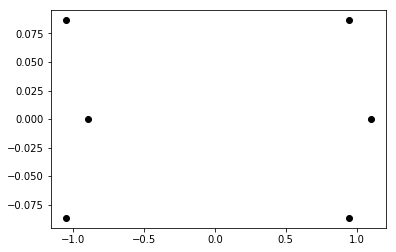

In [27]:
from sortedcollection import *
import scipy
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self,nodeName):
        self.node= nodeName
    def giveNode(self):
        return(self.node)
    def printNode(self):
        print(self.node)

class NodeList :
    """
    class NodeList :
    ====

    :type listOfNode: list[NodeLabel(str)]

    The listOfNodeT contains each layer once, and inside each layer, we find each node once, in which the intervals are sorted and not overlapping
    """
    def __init__(self,liste, key=lambda node : node.giveNode()):
        self.listOfNode = SortedCollection(iterable=liste,key=key)

    def addNode(self,n):
        if self.listOfNode.__contains__(n)==False : 
            self.listOfNode.insert(n)
    def giveListOfNodes(self):
        return(self.listOfNode)
    def printNodeList(self):
        print("listOfNodes")
        for n in self.listOfNode :
            n.printNode()
    def length(self):
        return(self.listOfNode.__len__())

class LayerNT :
    """
    class LayerNT :
    =====
    :type layerLabel: list[ElemLayer]
    :type nodes: NodeList
    """

    def __init__(self,layerStruct,layerLabel,nodes,checkCorrectL="True", checkCorrectN="True"):
        if checkCorrectL :
            if not(layerStruct.isALayerLabel(layerLabel)):
                print("not possible")
        self.layerLabel=layerLabel
        self.nodes = NodeList([])
        if checkCorrectN :
            for n in nodes.giveListOfNodes() :
                self.nodes.addNode(n)
        else :
            self.nodes=NodeList(nodes)

    def giveLayerLabel(self):
        return(self.layerLabel)
    def giveNodes(self):
        return(self.nodes)
    def addNode(self,n):
        self.nodes.addNode(n)
    def printLayer(self):
        print("layer"+str(self.layerLabel))
        print("nodes:")
        self.nodes.printNodeList()

class LayerNTList :
    """
    class LayerNTList:
    ======

    :type listOflayers : list[Layer]

    - each layerLabel appears one time max
    - each node appears one time max in each layer
    """
    def __init__(self,listOfLayersNT,key = lambda layer : layer.giveLayerLabel()):
        self.listOfLayersNT = SortedCollection(iterable=listOfLayersNT,key=key)
        self.condensate()

    def condensate(self,start=0):
        i = start
        while(i<(self.listOfLayersNT.__len__())-1):
            if self.listOfLayersNT[i].giveLayerLabel()==self.listOfLayersNT[i+1].giveLayerLabel():
                for n in self.listOfLayersNT[i+1].giveNodes():
                    self.listOfLayersNT[i].addNode(n)
                self.listOfLayersNT.pop(i+1)
            else:
                i=i+1
    def addLayer(self,layer):
        """
        function addLayer(layer)
        ===
        class LayerList
        ---

        :type layer: Layer

        add some node-layers from one layer.
        """
        if self.listOfLayersNT.contains_key(layer):
            i=self.listOfLayersNT.index_key(layer)
            for n in layer.giveNodes().giveListOfNodes():
                self.listOfLayersNT[i].addNode(n)
        else:
            self.listOfLayersNT.insert(layer)
    
    def length(self):
        return(self.listOfLayersNT.__len__())
    def giveLayer(self,i):
        return(self.listOfLayersNT[i])
    def giveLayerList(self):
        return(self.listOfLayersNT)
    def giveIndexLayer(self,layerLabel):
        return(self.lisOfLayersNT.index_label(layerLabel))
    def giveLayerFromLabel(self,label):
        print(label)
        if self.listOfLayersNT.contains_label(label):
            print("slkdsjfs")
            i=self.listOfLayersNT.index_label(label)
            print("coucou")
            return(self.giveLayer(i))
        else:
            print("error : this layer doesn't exist : ",label)
            
    def printLayerList(self):
        print("list of layers :")
        for l in self.listOfLayersNT :
            l.printLayer()

class LinkNT:
    """
    class LinkNT : 
    for now, very simplified.
    
    :type node1/2: node
    :type layerLabel1/2: str 
    
    todo : Find a better indexing ?
    """
    def __init__(self,node1,layerLabel1,node2,layerLabel2):
        if node1.giveNode()>node2.giveNode():
            layerLabel1,layerLabel2=layerLabel2,layerLabel1
            node1,node2=node2,node1
        self.node1=node1
        self.node2=node2
        self.layerLabel1=layerLabel1
        self.layerLabel2=layerLabel2
        #intervals.printIntervals()
    
    def giveNodes(self):
        return([self.node1,self.node2])
    def giveLayers(self):
        return([self.layerLabel1,self.layerLabel2])
    def giveLabel(self):
        return([self.node1.giveNode(),self.node2.giveNode(),self.layerLabel1,self.layerLabel2])
    def printLink(self):
        print("Link : ")
        self.node1.printNode()
        print("from"+str(self.layerLabel1))
        print("--->")
        self.node2.printNode()
        print("from"+str(self.layerLabel2))
        print("endlink")


class LinkNTList:
    """
    class LinkList : 
    the list is sorted by the names of node1, then the name of node2, then the layer1, then Layer2.
    
    """
    
    def __init__(self,liste,key=lambda link: link.giveLabel()):
        self.listOfLinks = SortedCollection(iterable=liste,key=key)
    
    def addLink(self,l,tolerance=0):
        if self.listOfLinks.contains_key(l)==False:
            self.listOfLinks.insert(l)
    def giveListOfLinks(self):
        return(self.listOfLinks)
    def printLinkList(self):
        print("list of link")
        for n in self.listOfLinks :
            n.printLink()
    def printListLabels(self):
        for l in self.listOfLinks:
            print(l.giveLabel())

            


class MultiLayer :
    """
    class MultiLayer :
        
    :type layers: LayerNTList
    :type links: LinkNTList
    """
    def __init__(self,struct,layers,links):
        self.layerStruct=struct
        self.layers = layers 
        self.em = links

    def addLayer(self, layer):
        '''
        function addLayer(layer)
        ===
        from class MultiStream :
        ----

        used to :
        - add simple layer without nodes
        - add node in a layer
        '''
        self.layers.addLayer(layer)
    def addLink(self,link,tolerance=0):
        #to do : check intervals coherence
        self.em.addLink(link,tolerance)
    def printML(self):
        print("layers and nodes")
        self.layers.printLayerList()
        print("EM")
        for e in self.em.giveListOfLinks():
            e.printLink()
    
    def extractLayer(self,layerLabels):
        multi=MultiLayer(self.layerStruct,LayerNTList([]),LinkNTList([]))
        for layerLabel in layerLabels:
            layer=self.layers.giveLayerFromLabel(layerLabel)
            multi.addLayer(layer)
            for e in self.em.giveListOfLinks():
                lay1=e.giveLayers()[0]
                lay2=e.giveLayers()[1]
                if lay1 in layerLabels:
                    if lay2 in layerLabels:
                        multi.addLink(e)
        return(multi)
    def drawML(self):
        nl=self.layers.length()
        pointsLay=[(np.cos(np.pi *2* k /nl),np.sin(np.pi *2* k /nl)) for k in range(nl)]
        points=[]
        n=0
        for l in self.layers.giveLayerList():
            npt=l.giveNodes().length()
            pl=[(np.cos(np.pi *2* k /npt),np.sin(np.pi *2* k /npt)) for k in range(npt)]
            points.append([(pointsLay[n][0]+0.1*pl[i][0],pointsLay[n][1]+0.1*pl[i][1]) for i in range(npt)])
            n=n+1
        npoints=len(points)
        for l in range(len(points)):
            for j in range(len(points[l])):
                print("plot")
                plt.plot(points[l][j][0],points[l][j][1],'ko')
        print(points)
        for e in self.em.giveListOfLinks():
            indexLayer1=self.layers.giveIndex(e.giveLabel())
            indexLayer2 = self.layers.giveIndex(e.giveLabel())
            indexNode1 = self.layers.giveLayer(indexLayer1).giveIndex(e.giveNodes()[0])
            indexNode1 = self.layers.giveLayer(indexLayer2).giveIndex(e.giveNodes()[1])
            plt.plot([points[indexLayer1][indexNode1][0],points[indexLayer2][indexNode2][0]],[points[indexLaye1][indexNode1][1],points[indexLayer2][indexNode2][1]],'r')
        plt.show()
        

n1=Node("n1")
n2=Node("n2")
n = NodeList([Node("n1"),Node("n2"),Node("n3")])
n.printNodeList()

l1=LayerNT(layStr,["l2"],n)
l2=LayerNT(layStr,["l1"],n)

L=LayerNTList([l1,l2])

L.printLayerList()

link=LinkNT(n1,"l2",n2,"l1")
liste=LinkNTList([link])

ml=MultiLayer(layStr,L,liste)
    
ml.printML()
ml.addLink(LinkNT(n2,"l2",n1,"l1"))
print("===================")
ml.printML()
ml.drawML()